In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
file_list = drive.ListFile({'q': "'189gZA08L8DiOdJ6WVONW6uFBqKyXo9XG' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Chicago_Crimes_2012_to_2017.csv, id: 1ms3aMkJRqNXUV8k28RyGgLX2LUA5zJX1
title: Chicago_Crimes_2008_to_2011.csv, id: 1ITYboB1pEnhE7wd-nCgTrx4FhFBbM3zc
title: Chicago_Crimes_2005_to_2007.csv, id: 1i3BUTBwV3JgfezQHUmfIk2_XqG-OYsmb
title: Chicago_Crimes_2001_to_2004.csv, id: 1LwYL97Yg_Zd77v6F9ce_nqsvC40WQdVg


In [0]:
cc_2001_2004 = drive.CreateFile({'id': '1LwYL97Yg_Zd77v6F9ce_nqsvC40WQdVg'})
cc_2001_2004.GetContentFile('Chicago_Crimes_2001_to_2004.csv')

cc_2005_2007 = drive.CreateFile({'id': '1i3BUTBwV3JgfezQHUmfIk2_XqG-OYsmb'})
cc_2005_2007.GetContentFile('Chicago_Crimes_2005_to_2007.csv')

cc_2008_2011 = drive.CreateFile({'id': '1ITYboB1pEnhE7wd-nCgTrx4FhFBbM3zc'})
cc_2008_2011.GetContentFile('Chicago_Crimes_2008_to_2011.csv')

cc_2012_2017 = drive.CreateFile({'id': '1ms3aMkJRqNXUV8k28RyGgLX2LUA5zJX1'})
cc_2012_2017.GetContentFile('Chicago_Crimes_2012_to_2017.csv')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
cc_2001_2004=pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False) 
cc_2005_2007=pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False) 
cc_2008_2011=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False) 
cc_2012_2017=pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False) 


b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [0]:
crimes=[cc_2001_2004,cc_2005_2007,cc_2008_2011,cc_2012_2017]
crimes=pd.concat(crimes,axis=0)

In [8]:
print(crimes.shape[0])

7941282


In [9]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [10]:
crimes['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [23]:
lc_count=pd.DataFrame(crimes.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index())
print(lc_count)

               Location Description   counts
0                            STREET  2101842
1                         RESIDENCE  1341749
2                          SIDEWALK   815595
3                         APARTMENT   812512
4                             OTHER   294286
5    PARKING LOT/GARAGE(NON.RESID.)   225454
6                             ALLEY   180155
7          SCHOOL, PUBLIC, BUILDING   173750
8                  RESIDENCE-GARAGE   158550
9           RESIDENCE PORCH/HALLWAY   138492
10               SMALL RETAIL STORE   134003
11           VEHICLE NON-COMMERCIAL   128311
12                       RESTAURANT   116295
13               GROCERY FOOD STORE   100812
14                 DEPARTMENT STORE    95201
15                      GAS STATION    82396
16    RESIDENTIAL YARD (FRONT/BACK)    75442
17          CHA PARKING LOT/GROUNDS    65124
18                    PARK PROPERTY    61322
19     COMMERCIAL / BUSINESS OFFICE    58200
20                     CTA PLATFORM    44710
21        

In [22]:
cc_count = pd.DataFrame(crimes.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
print(cc_count)

                         Primary Type   counts
0                               THEFT  1640506
1                             BATTERY  1442716
2                     CRIMINAL DAMAGE   923000
3                           NARCOTICS   885431
4                       OTHER OFFENSE   491922
5                             ASSAULT   481661
6                            BURGLARY   470958
7                 MOTOR VEHICLE THEFT   370548
8                             ROBBERY   300453
9                  DECEPTIVE PRACTICE   280931
10                  CRIMINAL TRESPASS   229366
11                       PROSTITUTION    86401
12                  WEAPONS VIOLATION    77429
13             PUBLIC PEACE VIOLATION    58548
14         OFFENSE INVOLVING CHILDREN    51441
15                CRIM SEXUAL ASSAULT    29868
16                        SEX OFFENSE    28707
17                           GAMBLING    18806
18               LIQUOR LAW VIOLATION    17513
19   INTERFERENCE WITH PUBLIC OFFICER    15710
20           

In [0]:
crimes.Date = pd.to_datetime(crimes.Date)
crimes.index = pd.DatetimeIndex(crimes.Date)

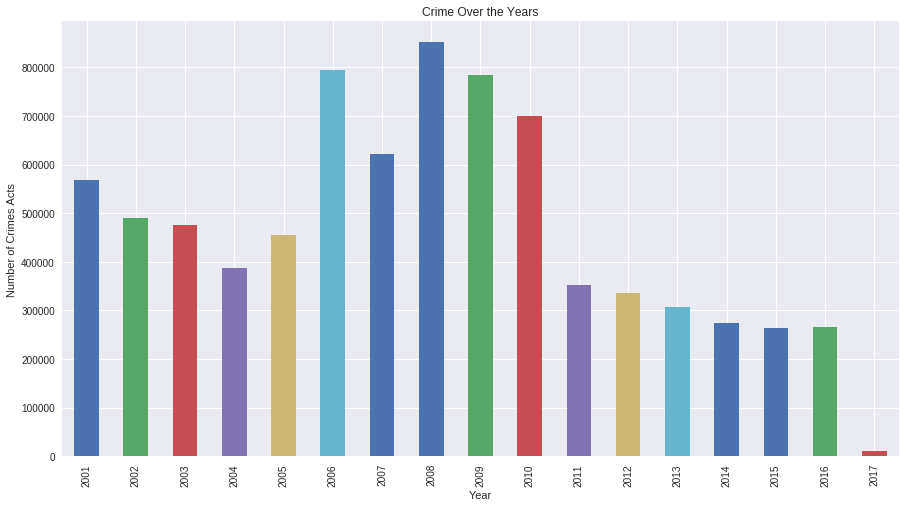

In [14]:
plt.figure(figsize = (15,8))
crimes.groupby([crimes.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (15,8))

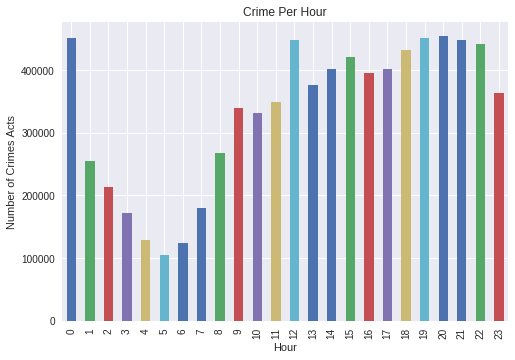

In [15]:
crimes.groupby([crimes.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [0]:
crime_rate = crimes.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type',index =crimes.index.date, fill_value = 0)
crime_rate.index = pd.DatetimeIndex(crime_rate.index)

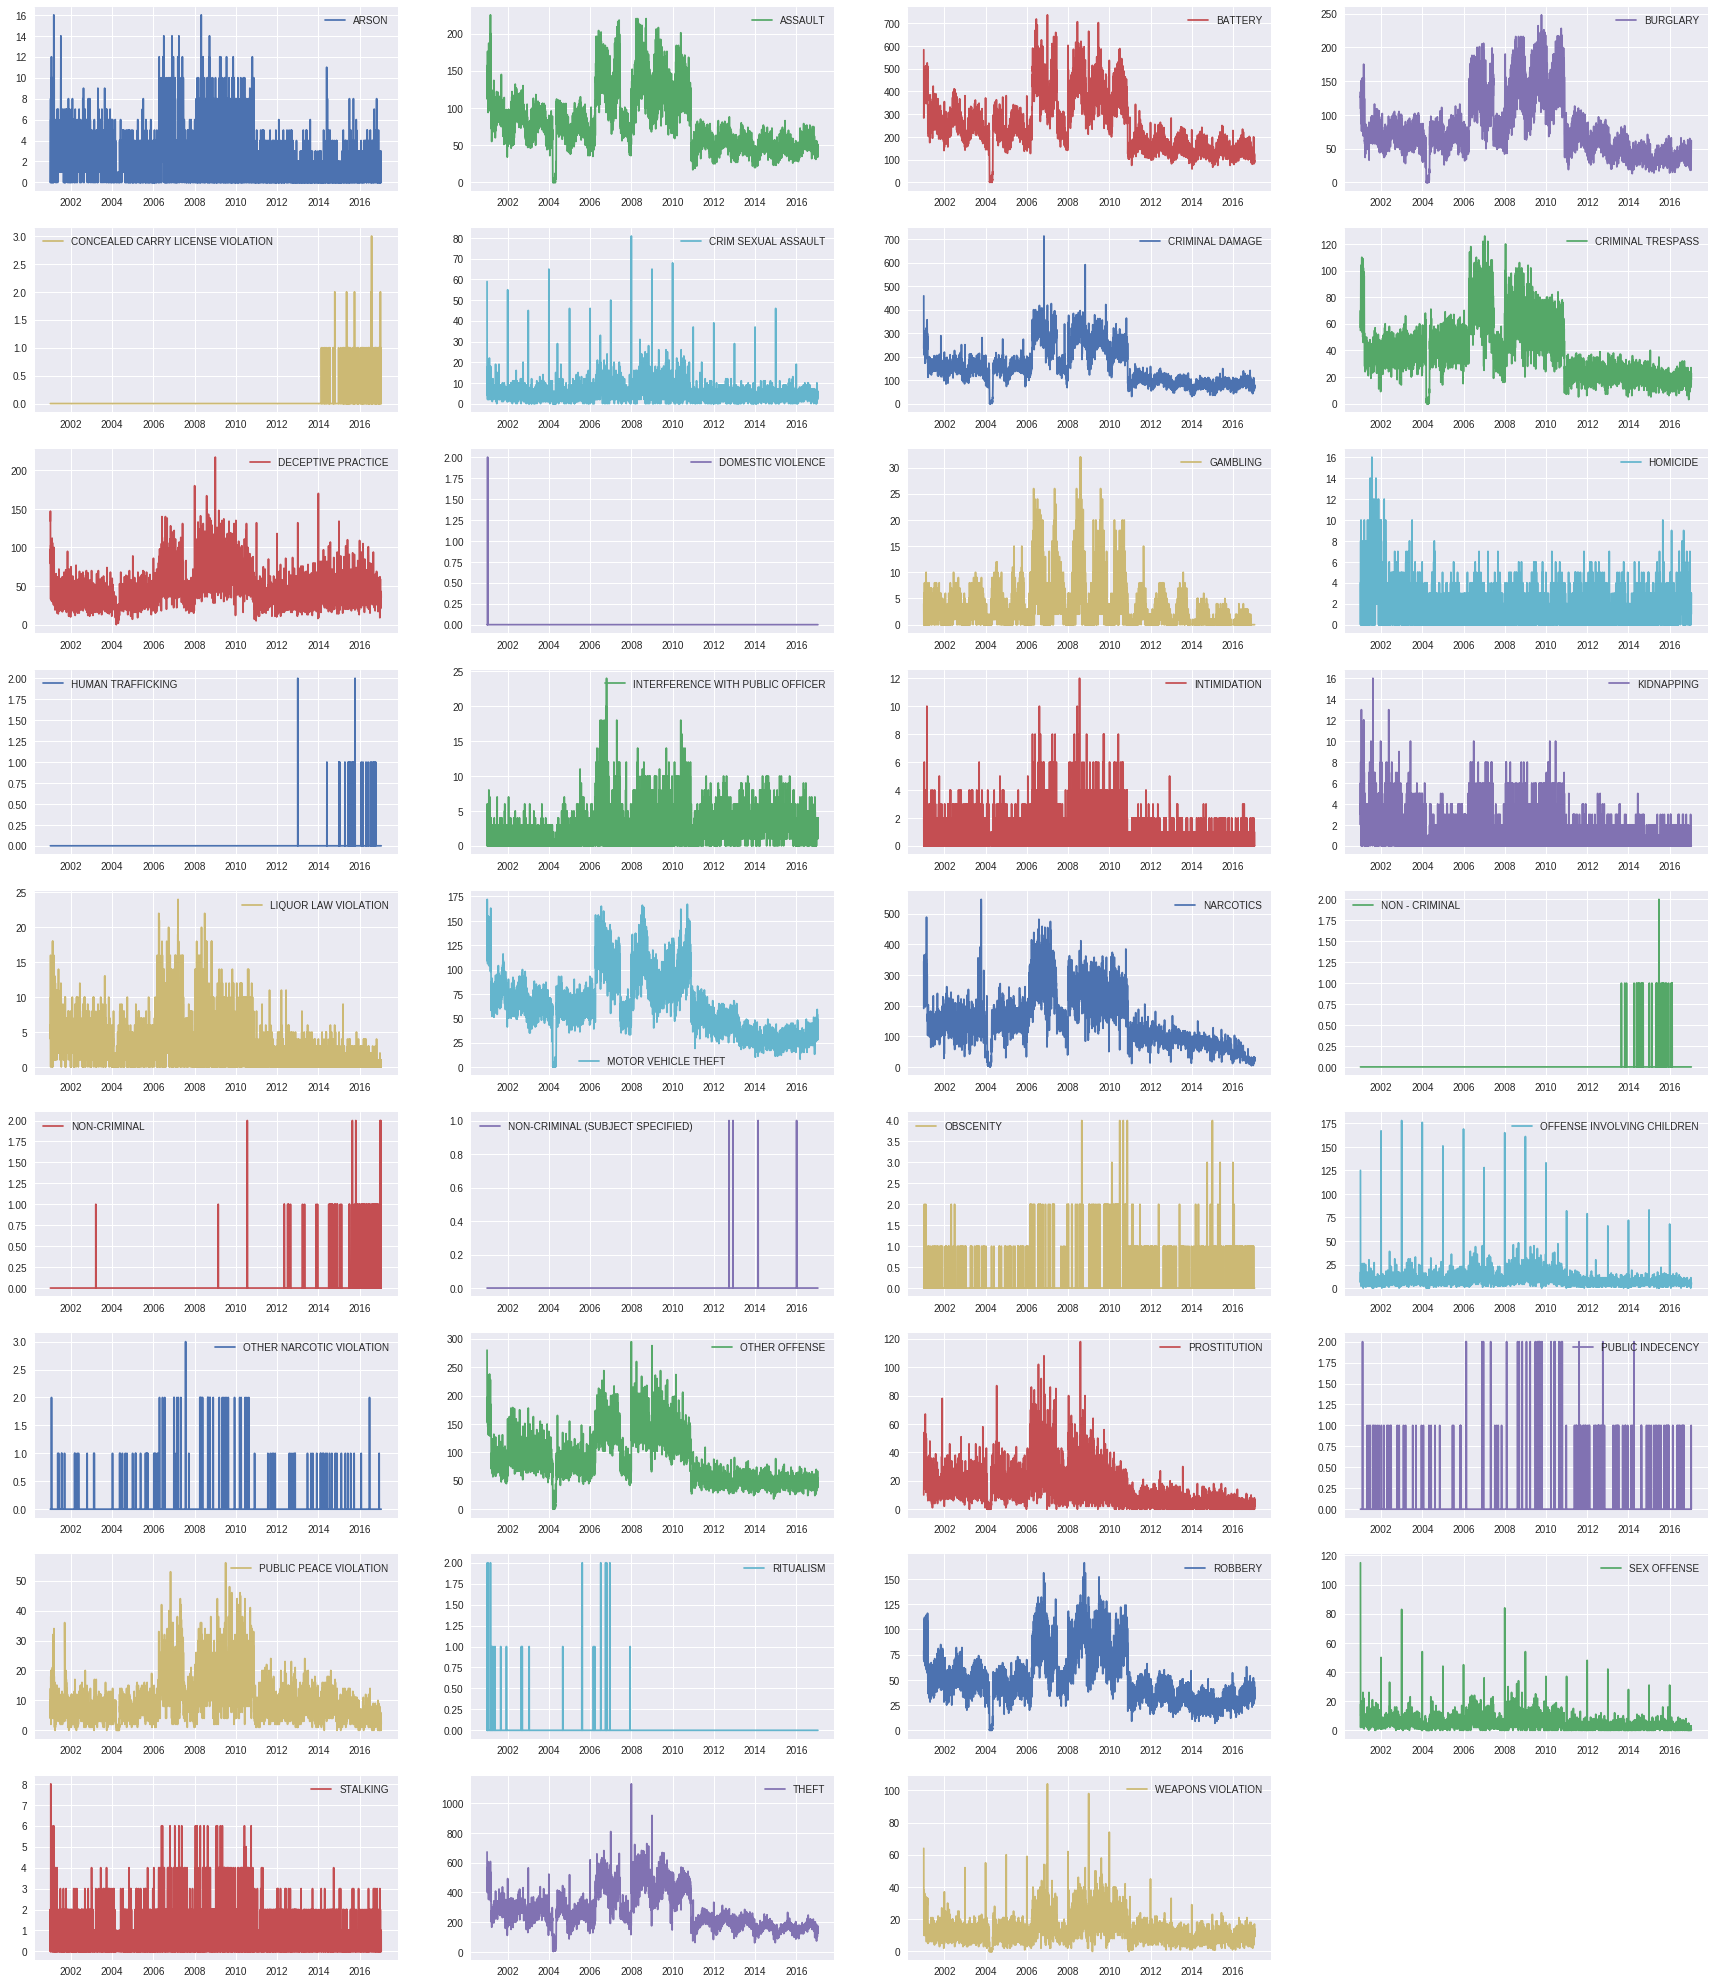

In [17]:
plot = crime_rate.plot(figsize = (30,40), subplots = True, layout = (10,4),sharex = False, sharey = False)
plt.show()

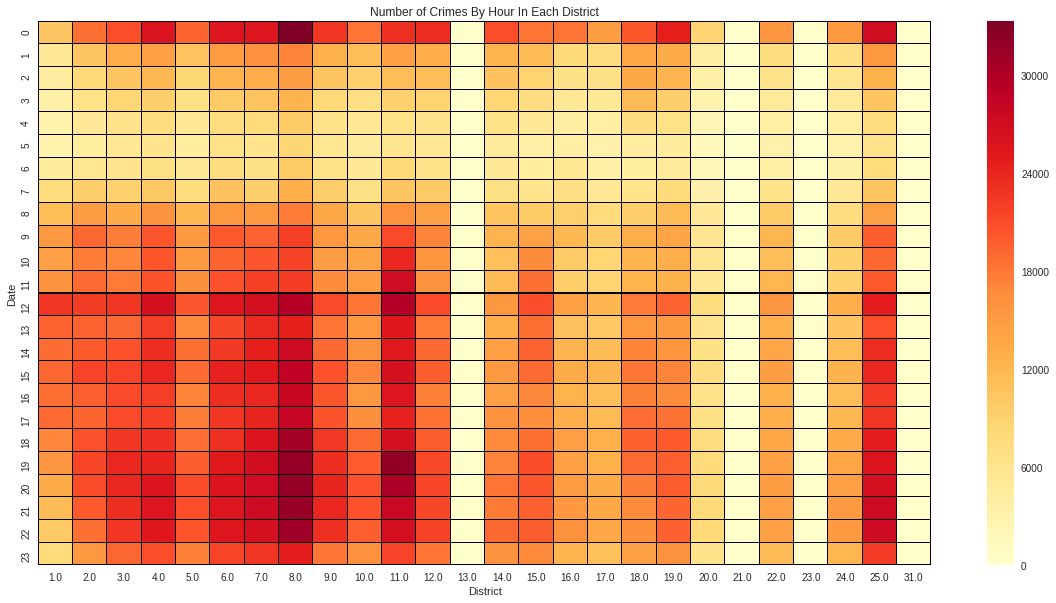

In [18]:
import seaborn as sns

Crime_By_District = crimes.pivot_table('Arrest', aggfunc = np.size, columns = 'District',
                               index = crimes.index.hour, fill_value = 0)
plt.figure(figsize = (20,10))
plt.title('Number of Crimes By Hour In Each District')
hm = sns.heatmap(Crime_By_District, cmap = 'YlOrRd', linewidth = 0.01, linecolor = 'k')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  


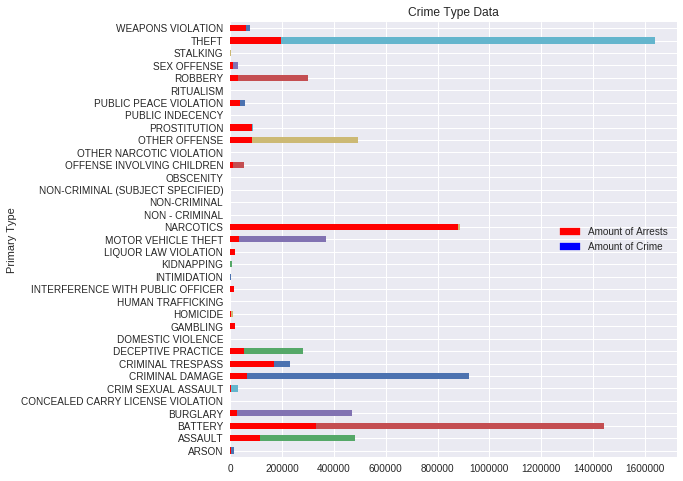

In [19]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')

Crime_Data_Type = crimes.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = crimes.index.date, fill_value = 0)

plt.figure(figsize = (8,8))
plt.hold(True)
crimes.groupby(crimes['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().plot(kind = 'barh', color ='r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
plt.hold(False)

